In [1]:
# basic packages
import pandas as pd
import numpy as np
import warnings

# visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from plotly import graph_objs as go
from plotly.graph_objs import *

%matplotlib inline

In [2]:
warnings.filterwarnings('ignore')

mapbox_access_token = "pk.eyJ1IjoicGxvdGx5bWFwYm94IiwiYSI6ImNqdnBvNDMyaTAxYzkzeW5ubWdpZ2VjbmMifQ.TXcBE-xg9BFdV2ocecc_7g"

In [ ]:
# importing and combining data

df1 = pd.read_csv('./data/initial/2013.csv')
df2 = pd.read_csv('./data/initial/2014.csv')
df3 = pd.read_csv('./data/initial/2015.csv')
df4 = pd.read_csv('./data/initial/2016.csv')
df5 = pd.read_csv('./data/initial/2017.csv')
df6 = pd.read_csv('./data/initial/2018.csv')

In [ ]:
# combining data and saving 

df = pd.concat([df1, df2, df3, df4, df5, df6])
df['starttime'] = pd.to_datetime(df['starttime'], format = '%Y-%m-%d %H:%M')
df['stoptime'] = pd.to_datetime(df['stoptime'], format = '%Y-%m-%d %H:%M')

df = df.set_index('starttime')
df.to_csv('./data/processed/combined.csv')
df.head()

In [3]:
# importing saved data
df = pd.read_csv('./data/processed/combined.csv')

df['starttime'] = pd.to_datetime(df['starttime'], format = '%Y-%m-%d %H:%M')
df['stoptime'] = pd.to_datetime(df['stoptime'], format = '%Y-%m-%d %H:%M')

df = df.set_index('starttime')
df.head()

,tripduration,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,customer_plan
starttime,,,,,,,,,,,,,,,
2013-12-24 15:50:04,1780,2013-12-24 16:19:44,439,E 4 St & 2 Ave,40.726281,-73.989780,271,Ashland Pl & Hanson Pl,40.685282,-73.978058,17993,Subscriber,1951.0,male,NaN
2013-11-18 18:32:00,646,2013-11-18 18:42:46,79,Franklin St & W Broadway,40.719116,-74.006667,3002,South End Ave & Liberty St,40.711512,-74.015756,16337,Subscriber,1945.0,male,NaN
2013-08-20 07:42:02,664,2013-08-20 07:53:06,352,W 56 St & 6 Ave,40.763406,-73.977225,477,W 41 St & 8 Ave,40.756405,-73.990026,19632,Subscriber,1950.0,male,NaN
2013-11-21 13:26:07,166,2013-11-21 13:28:53,195,Liberty St & Broadway,40.709056,-74.010434,316,Fulton St & William St,40.709560,-74.006536,20065,Subscriber,1951.0,male,NaN
2013-09-01 12:16:59,587,2013-09-01 12:26:46,363,West Thames St,40.708347,-74.017134,147,Greenwich St & Warren St,40.715422,-74.011220,17095,Subscriber,1952.0,male,NaN


# YOY Growth

* If we don't have complete data for each year, so simply looking at volume will give us a biased view of volume
* e.g. if a particular year has data only from the warmer months, we'd expect this would return an inflated amount for this year when looking at YOY average daily ride volume
* Likewise, if a particular year has disproportionate data from colder months, we'd expected the average dialy ride volume to be an underrepresentation of the true volume


    
* We'll investigate whether ridership volume is in fact higher in warmer months
* We'll also attempt to estimate the ridership volume for months we do not have data

# Biased YOY Average Dialy Volume

''

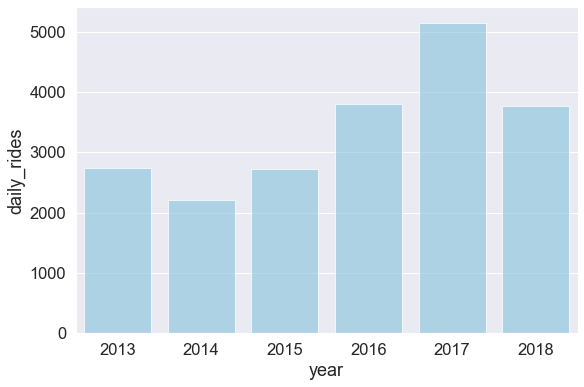

In [70]:
chart_df = []
years = ['2013', '2014', '2015', '2016', '2017', '2018']

for year in years:
    tmp_df = df[year]
    
    rides = len(tmp_df)
    day_count = len(np.unique(df[year].index.date))
    
    chart_df.append({
        'year' : year, 
        'day_count' : day_count, 
        'ride_count' : rides, 
        'daily_rides' : rides / day_count        
    })
    
chart_df = pd.DataFrame(data = chart_df)

sns.set(font_scale = 1.5, rc={'figure.figsize':(9, 6)})
sns.barplot(x = 'year', y = 'daily_rides', data = chart_df, color = "skyblue", alpha = 0.7)
;

- We can see that there is there is consistent growth between 2014 and 2017
- Intuitively, we would expect to see ridership growth as additional bike docks are added and users' behavior evolves to integrate this new means of transportation
- If the above is true, the decline in average daily volume between 2013 and 2014 is unexpected, and may be explained by the warmer / colder month bias discussed above
- Likewise, the downturn from 2017 and 2018 is unexpected

# For which months / years do we have data?

In [71]:
month_data = df['gender'].groupby([df.index.year, df.index.month, df.index.month_name()]).count()
month_df = pd.DataFrame(data = month_data)

month_df = month_df.rename_axis(index=['year', 'month_num', 'month']).reset_index()
month_df = month_df.rename(columns = {'gender' : 'count'})

month_df.pivot_table(index = ['month_num', 'month'], columns = 'year', values = 'count').fillna(0)

,year,2013,2014,2015,2016,2017,2018
month_num,month,,,,,,
1,January,0.0,30298.0,28458.0,50979.0,0.0,72148.0
2,February,0.0,22375.0,19513.0,56028.0,0.0,84076.0
3,March,0.0,43894.0,34160.0,92334.0,0.0,98222.0
4,April,0.0,66812.0,65867.0,101518.0,131493.0,130642.0
5,May,0.0,86905.0,96656.0,121279.0,152792.0,183280.0
6,June,0.0,93681.0,94593.0,146478.0,172666.0,0.0
7,July,83941.0,96459.0,108343.0,137997.0,173548.0,0.0
8,August,100226.0,96762.0,117240.0,155439.0,180821.0,0.0
9,September,103406.0,95532.0,128570.0,165233.0,187970.0,0.0


In [ ]:
# chart_df = df[['tripduration']].groupby(df.index.date).count()
# chart_df = chart_df.reset_index()
chart_df = chart_df.rename(columns = {'index' : 'date', 'tripduration' : 'count'})
chart_df['date'] = pd.to_datetime(chart_df['date'])
chart_df.dtypes

In [ ]:
mask = (chart_df['date'] >= pd.Timestamp('2013-07-01')) & (chart_df['date'] <= pd.Timestamp('2016-09-30'))
fig = go.Figure()

fig.add_trace(go.Scatter(
                x = chart_df[mask]['date'],
                y = chart_df[mask]['count'],
                name = 'Rider Volume YOY',
                line = dict(width = 4),
                opacity=0.8))
fig.update_layout(
    autosize = False, 
    width = 1600,
    height = 600, 
#     title = 'TMC vs.Budget 2019 - 2020',
    font=dict(
        family="Courier New, monospace",
        size=25,
        color="saddlebrown"))
fig.show()

In [ ]:
def chart(vertical):
    
    mask = (df['VERTICAL'] == vertical)
    fig = go.Figure()
    periods = [-3, -2, 0, 1, 2, 3]

    fig.update_layout(
        autosize = False, 
        width = 1400,
        height = 600, 
        title = vertical,
        font=dict(
            family="Courier New, monospace",
            size=25,
            color="#7f7f7f"))

    mode_size = [4, 4, 4, 4, 4, 4]

    colnames = df[mask].columns[8:]

    for i in range(len(colnames)):
        fig.add_trace(go.Scatter(
                        x = pd.date_range(start = '2020-01-01', end = '2020-03-18'),
                        y = df[mask][colnames[i]].shift(periods = periods[i]),
                        name = colnames[i],
                        line = dict(width = mode_size[i]),
                        opacity=0.8))
    
    fig.show()

# We have complete data in 2014 and 2015, lets see what seasonality looks like

In [ ]:
years = [2014, 2015]
for year in years:
    
    sns.set(font_scale = 1.5, rc={'figure.figsize':(18, 5)})
    sns.barplot(x = 'month', y = 'count', data = month_df[month_df['year'] == year], color = "skyblue", alpha = 0.7).set_title(year)
    plt.show()

- As expected, warmer months have higher ride volume
- Volume between July and Sept in 2014 is relaitvely constant and are the months with the highest volume, whereas September in 2015 is clearly higher thatn July and August, and represents the month with highest volume


- We'll first use a simplistic approach to estimating rider volume in missing months
- We'll later see if we can use some exogenous information to explain the variation in monthly volume which will also help us better estimate missing monthly data

# Estimate monthly volume then provide updated view of YOY Growth

In [ ]:
chart_df = []
years = ['2013', '2014', '2015', '2016', '2017', '2018']

for year in years:
    tmp_df = df[year]
    
    rides = len(tmp_df)
    day_count = len(np.unique(df[year].index.date))
    
    chart_df.append({
        'year' : year, 
        'day_count' : day_count, 
        'ride_count' : rides, 
        'daily_rides' : rides / day_count        
    })
    
chart_df = pd.DataFrame(data = chart_df)

sns.set(font_scale = 1.5, rc={'figure.figsize':(15, 9)})
sns.barplot(x = 'year', y = 'daily_rides', data = chart_df, color = "skyblue", alpha = 0.7)
;

In [ ]:
total_rides = len(df)

weekday_df = df[['tripduration']].groupby(df.index.weekday).count()
weekday_df = weekday_df.reset_index()
weekday_df = weekday_df.rename(columns = {'starttime' : 'num', 'tripduration' : 'count'})
weekday_df['percent'] = weekday_df['count'] / total_rides

data = {
    'num' : [0, 1, 2, 3, 4, 5, 6], 
    'day' : ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
}

weekday_df = weekday_df.merge(pd.DataFrame(data = data), on = 'num', how = 'inner')

sns.set(font_scale = 1.5, rc={'figure.figsize':(15, 9)})
sns.barplot(x = 'day', y = 'percent', data = weekday_df, color = "skyblue", alpha = 0.7)
;

# fig = px.bar(weekday_df, x = 'day', y = 'percent')
# fig.show()

In [ ]:
# demographics

# arbitrarity limiting age to 80 since there were age values in excess of 100
df['age'] = df.index.year - df['birth_year'] + 1

male = (df['gender'] == 'male') & (df['age'] <= 80)
female = (df['gender'] == 'female') & (df['age'] <= 80)
total = (df['gender'].isin(['female', 'male'])) & (df['age'] <= 80)

female_pct = df[female].shape[0] / df[total].shape[0]          
male_pct = df[male].shape[0] / df[total].shape[0]

data = {'gender' : ['female', 'male'], 'percent' : [female_pct, male_pct]}

fig = go.Figure(data = [go.Pie(labels = data['gender'], 
                               values = data['percent'], 
                               name = 'Gender Demo',
                               hole = 0.5, 
                               marker_colors = ['pink', 'skyblue'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=700
)

    
fig.show()

In [ ]:
# age distribution by gender

m = df[male]['age']
f = df[female]['age']

sns.set(font_scale = 1.5, rc={'figure.figsize':(18, 12)})

sns.kdeplot(m, shade=True, color = "skyblue", alpha = 0.7, label = 'Male')
sns.kdeplot(f, shade=True, color = 'red', alpha = 0.3, label = 'Female')
;

# Commuters

In [ ]:
com_df = pd.read_csv('./data/initial/commuters.csv')
com_df.head()

In [ ]:
# Dictionary of important locations in New York
list_of_locations = {
    "Madison Square Garden": {"lat": 40.7505, "lon": -73.9934},
    "Yankee Stadium": {"lat": 40.8296, "lon": -73.9262},
    "Empire State Building": {"lat": 40.7484, "lon": -73.9857},
    "New York Stock Exchange": {"lat": 40.7069, "lon": -74.0113},
    "JFK Airport": {"lat": 40.644987, "lon": -73.785607},
    "Grand Central Station": {"lat": 40.7527, "lon": -73.9772},
    "Times Square": {"lat": 40.7589, "lon": -73.9851},
    "Columbia University": {"lat": 40.8075, "lon": -73.9626},
    "United Nations HQ": {"lat": 40.7489, "lon": -73.9680},
}

In [ ]:
# chart defaults

zoom = 12.0
latInitial = 40.7272
lonInitial = -73.991251
bearing = 0

In [ ]:
# creating chart_df

sample_df = com_df.sample(frac = 0.1)
leave_home = sample_df[['depart_home', 'start_station_latitude', 'start_station_longitude']]
leave_home['event'] = 'leave_home'
leave_home['id'] = sample_df.index
leave_home = leave_home.rename(columns = {'depart_home' : 'timestamp', 'start_station_latitude' : 'lat', 'start_station_longitude' : 'lon'})

arrive_work = sample_df[['arrive_work', 'end_station_latitude', 'end_station_longitude']]
arrive_work['event'] = 'arrive_work'
arrive_work['id'] = sample_df.index
arrive_work = arrive_work.rename(columns = {'arrive_work' : 'timestamp', 'end_station_latitude' : 'lat', 'end_station_longitude' : 'lon'})

leave_work = sample_df[['depart_work', 'end_station_latitude', 'end_station_longitude']]
leave_work['event'] = 'leave_work'
leave_work['id'] = sample_df.index
leave_work = leave_work.rename(columns = {'depart_work' : 'timestamp', 'end_station_latitude' : 'lat', 'end_station_longitude' : 'lon'})

arrive_home = sample_df[['arrive_home', 'start_station_latitude', 'start_station_longitude']]
arrive_home['event'] = 'arrive_home'
arrive_home['id'] = sample_df.index
arrive_home = arrive_home.rename(columns = {'arrive_home' : 'timestamp', 'start_station_latitude' : 'lat', 'start_station_longitude' : 'lon'})

chart_df = pd.concat([leave_home, arrive_work, leave_work, arrive_home], axis = 0)
columns = ['timestamp', 'id', 'event', 'lat', 'lon']

chart_df = chart_df[columns]
chart_df['timestamp'] = pd.to_datetime(chart_df['timestamp'], format="%Y-%m-%d %H:%M")
chart_df = chart_df.set_index('timestamp')

# confirming chart_df dim
display(chart_df.shape[0] == sample_df.shape[0] * 4)
chart_df.head()

In [ ]:
tst_mask = (chart_df['event'] == 'leave_home') & (chart_df.index.year == 2013)
tst_df = chart_df[tst_mask]

In [ ]:
tst_df.shape[0]

In [ ]:
def map(year):

    tst_mask = (chart_df['event'] == 'leave_home') & (chart_df.index.year == year)
    tst_df = chart_df[tst_mask]

    fig = go.Figure(
        data = [
    #         Data for all rides based on date and time
            Scattermapbox(
                lat = tst_df['lat'],
                lon = tst_df['lon'],
                mode = 'markers',
                marker = dict(
                    showscale = True,
    #                 color = np.append(np.insert(listCoords.index.hour, 0 , 0), 23),
                    opacity = 0.5,
                    size = 5,
                    colorscale = [                
                        [0, "#F4EC15"],
                        [0.04167, "#DAF017"],
                        [0.0833, "#BBEC19"],
                        [0.125, "#9DE81B"],
                        [0.1667, "#80E41D"],
                        [0.2083, "#66E01F"],
                        [0.25, "#4CDC20"],
                        [0.292, "#34D822"],
                        [0.333, "#24D249"],
                        [0.375, "#25D042"],
                        [0.4167, "#26CC58"],
                        [0.4583, "#28C86D"],
                        [0.50, "#29C481"],
                        [0.54167, "#2AC093"],
                        [0.5833, "#2BBCA4"],
                        [1.0, "#613099"],
                    ],
    #                 colorbar = dict(
    #                         title="Time of<br>Day",
    #                         x=0.93,
    #                         xpad=0,
    #                         nticks=24,
    #                         tickfont=dict(color="#d8d8d8"),
    #                         titlefont=dict(color="#d8d8d8"),
    #                         thicknessmode="pixels",                    
    #                 ),
                ),
            ),
            # Plot of important locations on the map
            Scattermapbox(
                lat=[list_of_locations[i]["lat"] for i in list_of_locations],
                lon=[list_of_locations[i]["lon"] for i in list_of_locations],
                mode="markers",
                hoverinfo="text",
                text=[i for i in list_of_locations],
                marker=dict(size=8, color="#ffa0a0"),
            ),        
        ],
        layout=Layout(
            autosize=True,
            margin=go.layout.Margin(l=0, r=35, t=0, b=0),
            showlegend=False,
            mapbox=dict(
                accesstoken=mapbox_access_token,
                center=dict(lat=latInitial, lon=lonInitial),  # 40.7272  # -73.991251
                style="dark",
                bearing=bearing,
                zoom=zoom,
            ),
            updatemenus=[
                dict(
                    buttons=(
                        [
                            dict(
                                args=[
                                    {
                                        "mapbox.zoom": 12,
                                        "mapbox.center.lon": "-73.991251",
                                        "mapbox.center.lat": "40.7272",
                                        "mapbox.bearing": 0,
                                        "mapbox.style": "dark",
                                    }
                                ],
                                label="Reset Zoom",
                                method="relayout",
                            )
                        ]
                    ),
                    direction="left",
                    pad={"r": 0, "t": 0, "b": 0, "l": 0},
                    showactive=False,
                    type="buttons",
                    x=0.45,
                    y=0.02,
                    xanchor="left",
                    yanchor="bottom",
                    bgcolor="#323130",
                    borderwidth=1,
                    bordercolor="#6d6d6d",
                    font=dict(color="#FFFFFF"),
                )
            ],
        ),
    )
    fig.update_layout(
        autosize = False,
        width = 1100,
        height = 700
    )

    fig.show()

In [ ]:
# chart defaults

zoom = 11.0
latInitial = 40.7272
lonInitial = -73.991251
bearing = 0

In [ ]:
map(2016)

In [ ]:
def test(year):

    tst_mask = (chart_df['event'] == 'leave_home') & (chart_df.index.year == year)
    tst_df = chart_df[tst_mask]
    
    return tst_df

# Time Series with Prophet

In [366]:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

from sklearn.metrics import mean_absolute_error as MAE
from scipy.stats import skew

In [107]:
def rmse_plot(df_cv, rmse):
    plot_start = df_cv.iloc[0]['ds'] + timedelta(days = 36)
    plot_end = df_cv.iloc[0]['ds'] + timedelta(days = (36 + 320))

    fig = go.Figure()

    fig.update_layout(
        autosize = True, 
        width = 600,
        height = 350, 
        title = 'RMSE',
        font=dict(
            family="Courier New, monospace",
            size=12,
            color="#7f7f7f"),
        margin=dict(
        l=50,
        r=50,
        b=50,
        t=75,
        pad=4))
    fig.update_yaxes(rangemode = 'tozero')

    columns = list(rmse.columns[1:])
    for col in columns:
        fig.add_trace(go.Scatter(
                        x = pd.date_range(start = plot_start, end = plot_end),
                        y = rmse[col],
                        name = col,
                        line = dict(width = 2),
                        opacity=0.8))

    fig.show()

In [269]:
def prepare_data(data, year=2017): 
    """
    prepare the data for ingestion by fbprophet: 
    see: https://facebook.github.io/prophet/docs/quick_start.html
    
    1) divide in training and test set, using the `year` parameter (int)
    
    2) reset the index and rename the `datetime` column to `ds`
    
    returns the training and test dataframes
    Parameters
    ----------
    data : pandas.DataFrame 
        The dataframe to prepare, needs to have a datetime index
    year: integer 
        The year separating the training set and the test set (includes the year)
    Returns
    -------
    data_train : pandas.DataFrame
        The training set, formatted for fbprophet.
    data_test :  pandas.Dataframe
        The test set, formatted for fbprophet.
    """
    
    
    data_train = data.loc[:str(year - 1),:]
    
    data_test = data.loc[str(year):,:]
    
    data_train.reset_index(inplace=True)
    
    data_test.reset_index(inplace=True)
    
    data_train = data_train.rename({'datetime':'ds'}, axis=1)
    
    data_test = data_test.rename({'datetime':'ds'}, axis=1)
    
    return data_train, data_test

In [558]:
# creating df for time series
df_fb = df[['tripduration']].groupby(df.index.date).count()
df_fb.index = pd.to_datetime(df_fb.index)
df_fb = df_fb.loc[:'2016-10', :]
df_fb = df_fb.rename(columns = {'tripduration' : 'y'})

In [559]:
df_train = df_fb.loc[:'2015-09', :]
df_test = df_fb.loc['2015-10':, :]

In [560]:
df_train.reset_index(inplace = True)
df_train.rename(columns = {'index' : 'ds'}, inplace = True)
df_train.head()

,ds,y
0,2013-07-01,1691
1,2013-07-02,2268
2,2013-07-03,2127
3,2013-07-04,2203
4,2013-07-05,2247


In [561]:
df_train.tail()

,ds,y
815,2015-09-26,4259
816,2015-09-27,3778
817,2015-09-28,4673
818,2015-09-29,4871
819,2015-09-30,3869


# Need to revisit missing data

In [562]:
set(set(pd.date_range(start = '2013-07-01', end = '2015-09-30')) - set(df_fb.loc[:'2015-09', :].index))

{Timestamp('2013-12-31 00:00:00', freq='D'),
 Timestamp('2014-12-31 00:00:00', freq='D')}

In [563]:
df_test.reset_index(inplace = True)
df_test.rename(columns = {'index' : 'ds'}, inplace = True)
df_test.tail()

,ds,y
356,2016-09-26,6160
357,2016-09-27,6288
358,2016-09-28,5903
359,2016-09-29,5554
360,2016-09-30,2128


In [564]:
df_test.head()

,ds,y
0,2015-10-01,3545
1,2015-10-02,937
2,2015-10-03,1674
3,2015-10-04,2970
4,2015-10-05,4443


In [565]:
set(set(pd.date_range(start = '2015-10-01', end = '2016-09-30')) - set(df_fb.loc['2015-10':, :].index))

{Timestamp('2015-12-31 00:00:00', freq='D'),
 Timestamp('2016-01-23 00:00:00', freq='D'),
 Timestamp('2016-01-24 00:00:00', freq='D'),
 Timestamp('2016-01-25 00:00:00', freq='D'),
 Timestamp('2016-01-26 00:00:00', freq='D')}

In [566]:
model = Prophet(mcmc_samples = 300, yearly_seasonality = 10, weekly_seasonality = True, changepoint_prior_scale = 0.1, seasonality_mode = 'multiplicative')
model.add_country_holidays(country_name = 'US')
model.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [567]:
future = model.make_future_dataframe(periods = df_test.shape[0], freq = '1D')
future.head()

,ds
0,2013-07-01
1,2013-07-02
2,2013-07-03
3,2013-07-04
4,2013-07-05


In [568]:
future.tail()

,ds
1176,2016-09-21
1177,2016-09-22
1178,2016-09-23
1179,2016-09-24
1180,2016-09-25


In [569]:
forecast = model.predict(future)

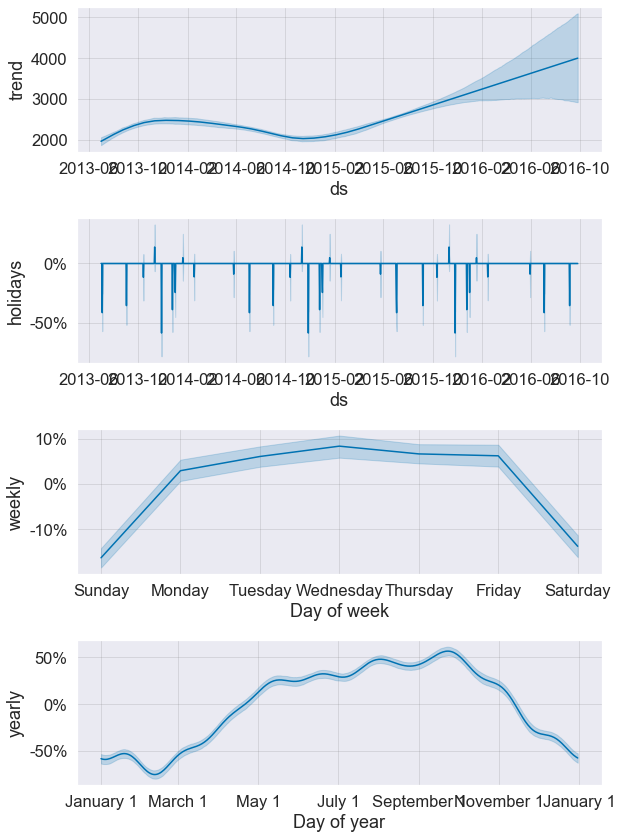

In [570]:
model.plot_components(forecast);

In [571]:
forecast.index = pd.to_datetime(forecast.ds)

df_train.index = pd.to_datetime(df_train.ds)
df_test.index = pd.to_datetime(df_test.ds)
data = pd.concat([df_train, df_test], axis=0)

forecast.loc[:,'y'] = data.loc[:,'y']

verif = forecast

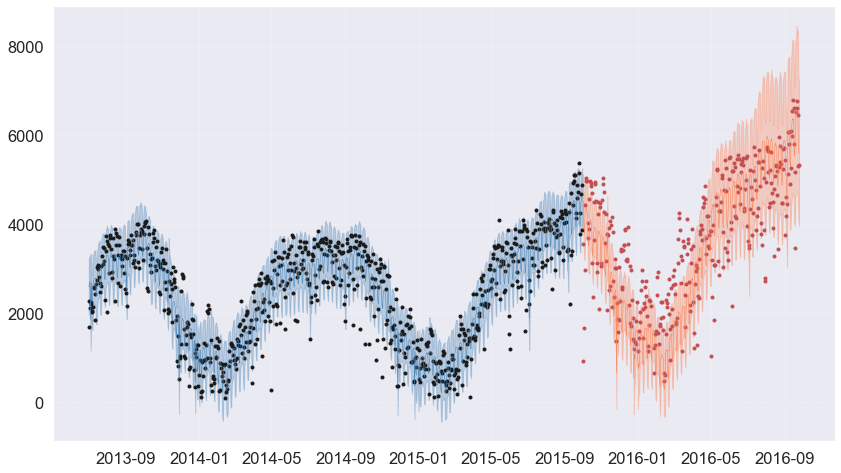

In [572]:
f, ax = plt.subplots(figsize=(14, 8))

train = verif.loc[:'2015-09',:]

ax.plot(train.index, train.y, 'ko', markersize=3)
ax.plot(train.index, train.yhat, color='steelblue', lw=0.5)
ax.fill_between(train.index, train.yhat_lower, train.yhat_upper, color='steelblue', alpha=0.3)

test = verif.loc['2015-10':,:]

ax.plot(test.index, test.y, 'ro', markersize=3)
ax.plot(test.index, test.yhat, color='coral', lw=0.5)
ax.fill_between(test.index, test.yhat_lower, test.yhat_upper, color='coral', alpha=0.3)

# ax.axvline('2015-10', color='0.8', alpha=0.7)
ax.grid(ls=':', lw=0.5)

f;

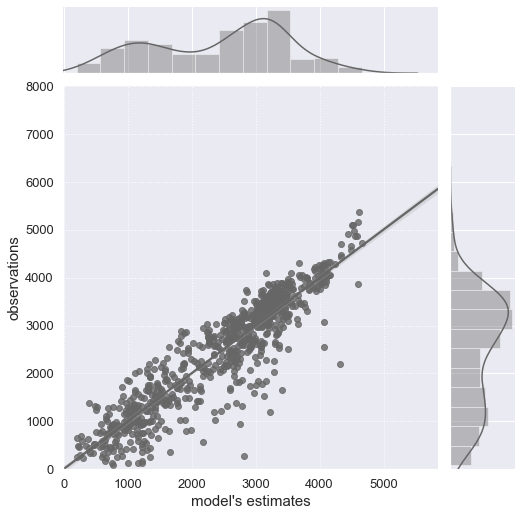

In [573]:
# train set 
g = sns.jointplot(x='yhat', y='y', data = verif.loc[:'2015-09',:], kind="reg", color="0.4")

g.fig.set_figwidth(8)
g.fig.set_figheight(8)

ax = g.fig.axes[1]

# if title is not None: 
#     ax.set_title(title, fontsize=16)

ax = g.fig.axes[0]

ax.set_xlim([-5, None])
ax.set_ylim([-5, 8000])

# ax.text(100, 2500, "R = {:+4.2f}\nMAE = {:4.1f}".format(verif.loc[:,['y','yhat']].corr().iloc[0,1], MAE(verif.loc[:,'y'].values, verif.loc[:,'yhat'].values)), fontsize=16)

ax.set_xlabel("model's estimates", fontsize=15)

ax.set_ylabel("observations", fontsize=15)

ax.grid(ls=':')

[l.set_fontsize(13) for l in ax.xaxis.get_ticklabels()]
[l.set_fontsize(13) for l in ax.yaxis.get_ticklabels()];

ax.grid(ls=':');

# if fname is not None: 
#     for ext in ['png','jpeg','pdf']: 
#         g.fig.savefig(os.path.join(fpath, "{}.{}".format(fname, ext)), dpi=200)

In [574]:
verif.loc[:'2015-09',['y','yhat']].corr()

,y,yhat
y,1.000000,0.917941
yhat,0.917941,1.000000


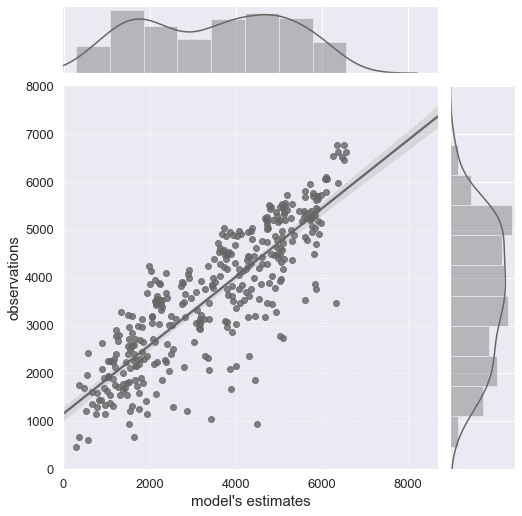

In [575]:
# train set 
g = sns.jointplot(x='yhat', y='y', data = verif.loc['2015-10':,:], kind="reg", color="0.4")

g.fig.set_figwidth(8)
g.fig.set_figheight(8)

ax = g.fig.axes[1]

# if title is not None: 
#     ax.set_title(title, fontsize=16)

ax = g.fig.axes[0]

ax.set_xlim([-5, None])
ax.set_ylim([-5, 8000])

# ax.text(100, 2500, "R = {:+4.2f}\nMAE = {:4.1f}".format(verif.loc[:,['y','yhat']].corr().iloc[0,1], MAE(verif.loc[:,'y'].values, verif.loc[:,'yhat'].values)), fontsize=16)

ax.set_xlabel("model's estimates", fontsize=15)

ax.set_ylabel("observations", fontsize=15)

ax.grid(ls=':')

[l.set_fontsize(13) for l in ax.xaxis.get_ticklabels()]
[l.set_fontsize(13) for l in ax.yaxis.get_ticklabels()];

ax.grid(ls=':');

# if fname is not None: 
#     for ext in ['png','jpeg','pdf']: 
#         g.fig.savefig(os.path.join(fpath, "{}.{}".format(fname, ext)), dpi=200)

In [576]:
verif.loc['2015-10':,['y','yhat']].corr()

,y,yhat
y,1.000000,0.847318
yhat,0.847318,1.000000


Text(0.5, 1.0, 'Residuals distribution (test set)')

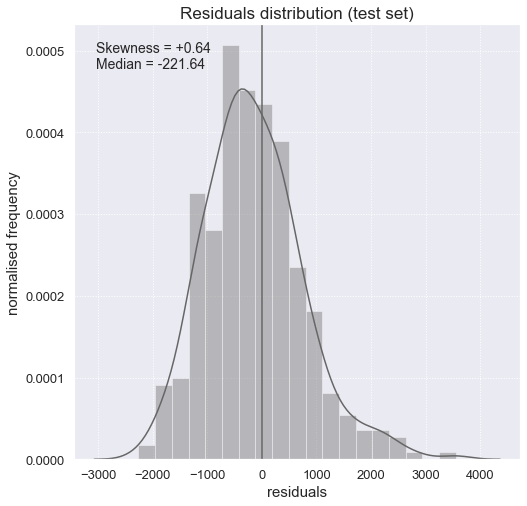

In [577]:
f, ax = plt.subplots(figsize=(8,8))
sns.distplot((verif.loc['2015-10':,'yhat'].fillna(0) - verif.loc['2015-10':,'y'].fillna(0)), ax=ax, color='0.4')
ax.grid(ls=':')
ax.set_xlabel('residuals', fontsize=15)
ax.set_ylabel("normalised frequency", fontsize=15)
ax.grid(ls=':')

[l.set_fontsize(13) for l in ax.xaxis.get_ticklabels()]
[l.set_fontsize(13) for l in ax.yaxis.get_ticklabels()];

ax.text(0.05, 0.9, "Skewness = {:+4.2f}\nMedian = {:+4.2f}".\
        format(skew(verif.loc['2015-10':,'yhat'].fillna(0) - verif.loc['2015-10':,'y'].fillna(0)), (verif.loc['2015-10':,'yhat'].fillna(0) - verif.loc['2015-10':,'y'].fillna(0)).median()), \
        fontsize=14, transform=ax.transAxes)

ax.axvline(0, color='0.4')

ax.set_title('Residuals distribution (test set)', fontsize=17)

In [514]:
# reading in precipitation data
description = pd.read_csv('./data/weather/weather_description.csv')[['datetime', 'New York']]
description['datetime'] = description['datetime'].apply(lambda x: pd.Timestamp(x))
description = description.set_index(['datetime'])


# creating indicator if column contains keywords
des = list(description['New York'].unique()[1:])
keywords = ['rain', 'snow', 'drizzle', 'storm', 'mist']
indicies = [i for i, x in enumerate(list(des)) if any(y in x for y in keywords)]
precip_list = [des[i] for i in indicies]

# converting to bool, taking daily average and rounding up to indicate if there was preip at any point during day
description['precip'] = description['New York'].apply(lambda x: x in precip_list) * 1
description = description[['precip']].groupby(description.index.date).mean()
description['precip_bool'] = np.ceil(description.precip)
description.index = pd.to_datetime(description.index)

In [511]:
description.head()

,precip,precip_bool
2012-10-01,0.000000,0.0
2012-10-02,0.000000,0.0
2012-10-03,0.250000,1.0
2012-10-04,0.666667,1.0
2012-10-05,0.458333,1.0


In [517]:
# reading in temp data 
temp = pd.read_csv('./data/weather/temperature.csv')[['datetime', 'New York']]
temp['datetime'] = temp['datetime'].apply(lambda x: pd.Timestamp(x))
temp = temp.set_index(['datetime'])


# calculating daily averages
temp = temp.groupby(temp.index.date).mean().dropna()
temp = temp.rename(columns = {'New York' : 'temp'})


# converting kelvin to farenheit
temp['temp'] = (temp['temp'] - 273.15) * 9/5 + 32
temp.index = pd.to_datetime(temp.index)

In [523]:
temp.index

DatetimeIndex(['2012-10-01', '2012-10-02', '2012-10-03', '2012-10-04',
               '2012-10-05', '2012-10-06', '2012-10-07', '2012-10-08',
               '2012-10-09', '2012-10-10',
               ...
               '2017-10-19', '2017-10-20', '2017-10-21', '2017-10-22',
               '2017-10-23', '2017-10-24', '2017-10-25', '2017-10-26',
               '2017-10-27', '2017-10-28'],
              dtype='datetime64[ns]', length=1854, freq=None)

In [545]:
# reading in wind data 
wind = pd.read_csv('./data/weather/wind_speed.csv')[['datetime', 'New York']]
wind['datetime'] = wind['datetime'].apply(lambda x: pd.Timestamp(x))
wind = wind.set_index(['datetime'])

# calculating daily averages
wind = wind.groupby(wind.index.date).mean().dropna()
wind = wind.rename(columns = {'New York' : 'wind'})
wind = wind.reset_index().rename(columns = {'index' : 'ds'})
wind['ds'] = pd.to_datetime(wind['ds'])

In [546]:
wind.head()

,ds,wind
0,2012-10-01,6.363636
1,2012-10-02,4.833333
2,2012-10-03,2.416667
3,2012-10-04,1.875000
4,2012-10-05,1.375000


In [541]:
df_fb_reg = df_fb
df_fb_reg = df_fb_reg.reset_index().rename(columns = {'index' : 'ds'})
df_fb_reg.head()

,ds,y
0,2013-07-01,1691
1,2013-07-02,2268
2,2013-07-03,2127
3,2013-07-04,2203
4,2013-07-05,2247


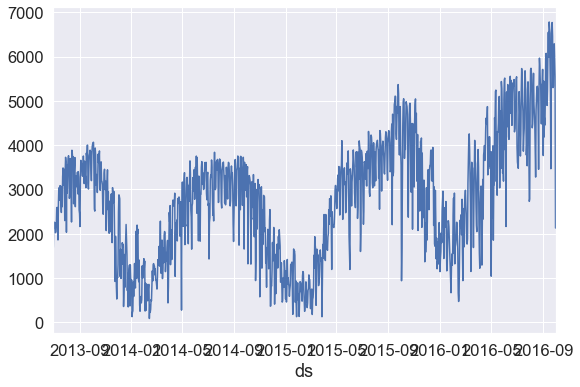

In [268]:
df_fb.set_index('ds')['y'].plot()

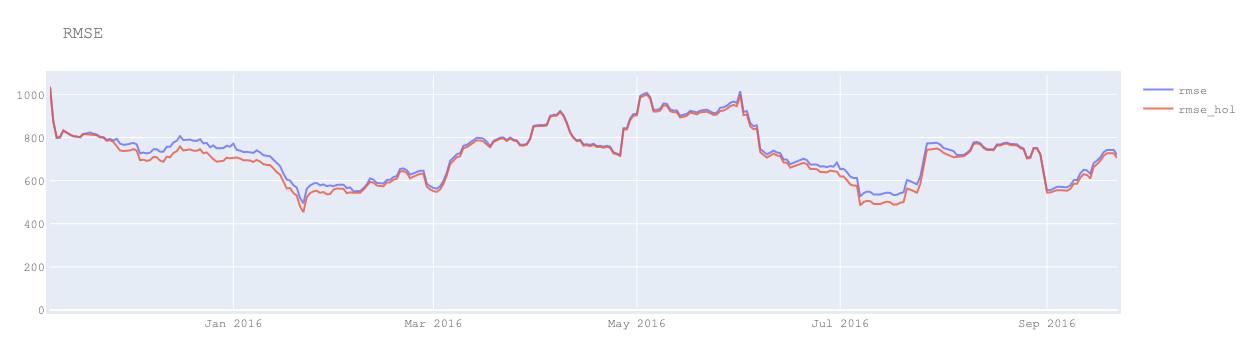

In [108]:
# creating df for time series
df_fb = df[['tripduration']].groupby(df.index.date).count()
df_fb = df_fb.reset_index()
df_fb = df_fb.rename(columns = {'index' : 'ds', 'tripduration' : 'y'})
df_fb = df_fb[df_fb['ds'] <= pd.Timestamp('2016-09-30')]

# instantiating prophet object and calling the fit method
model = Prophet()
model.fit(df_fb)

model_hol = Prophet()
model_hol.add_country_holidays(country_name = 'US')
model_hol.fit(df_fb)

# creating cross validation dataframe
df_cv = cross_validation(model, initial = '720 days', period='180 days', horizon = '365 days')
df_cv_hol = cross_validation(model_hol, initial = '720 days', period='180 days', horizon = '365 days')

# creating performace metrics dataframe and plotting rmse
df_p = performance_metrics(df_cv)
df_p_hol = performance_metrics(df_cv_hol)


rmse = pd.DataFrame()
rmse['horizon'] = df_p['horizon']
rmse['rmse'] = df_p['rmse']
rmse['rmse_hol'] = df_p_hol['rmse']

# plotting rmse
rmse_plot(df_cv, rmse)

In [206]:
# reading in temp data 
temp = pd.read_csv('./data/weather/temperature.csv')[['datetime', 'New York']]
temp['datetime'] = temp['datetime'].apply(lambda x: pd.Timestamp(x))
temp = temp.set_index(['datetime'])


# calculating daily averages
temp = temp.groupby(temp.index.date).mean().dropna()
temp = temp.rename(columns = {'New York' : 'temp'})


# converting kelvin to farenheit
temp['temp'] = (temp['temp'] - 273.15) * 9/5 + 32

In [226]:
# reading in precipitation data
description = pd.read_csv('./data/weather/weather_description.csv')[['datetime', 'New York']]
description['datetime'] = description['datetime'].apply(lambda x: pd.Timestamp(x))
description = description.set_index(['datetime'])


# creating indicator if column contains keywords
des = list(description['New York'].unique()[1:])
keywords = ['rain', 'snow', 'drizzle', 'storm', 'mist']
indicies = [i for i, x in enumerate(list(des)) if any(y in x for y in keywords)]
precip_list = [des[i] for i in indicies]

# converting to bool, taking daily average and rounding up to indicate if there was preip at any point during day
description['precip'] = description['New York'].apply(lambda x: x in precip_list) * 1
description = description[['precip']].groupby(description.index.date).mean()
description['precip'] = np.ceil(description.precip)

In [257]:
# reading in temp data 
wind = pd.read_csv('./data/weather/wind_speed.csv')[['datetime', 'New York']]
wind['datetime'] = wind['datetime'].apply(lambda x: pd.Timestamp(x))
wind = wind.set_index(['datetime'])


# calculating daily averages
wind = wind.groupby(wind.index.date).mean().dropna()
wind = wind.rename(columns = {'New York' : 'wind'})

In [258]:
df_fb = df_fb.merge(temp, left_on = 'ds', right_on = temp.index)
df_fb = df_fb.merge(description, left_on = 'ds', right_on = description.index)
df_fb = df_fb.merge(wind, left_on = 'ds', right_on = wind.index)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 1 forecasts with cutoffs between 2015-10-01 00:00:00 and 2015-10-01 00:00:00


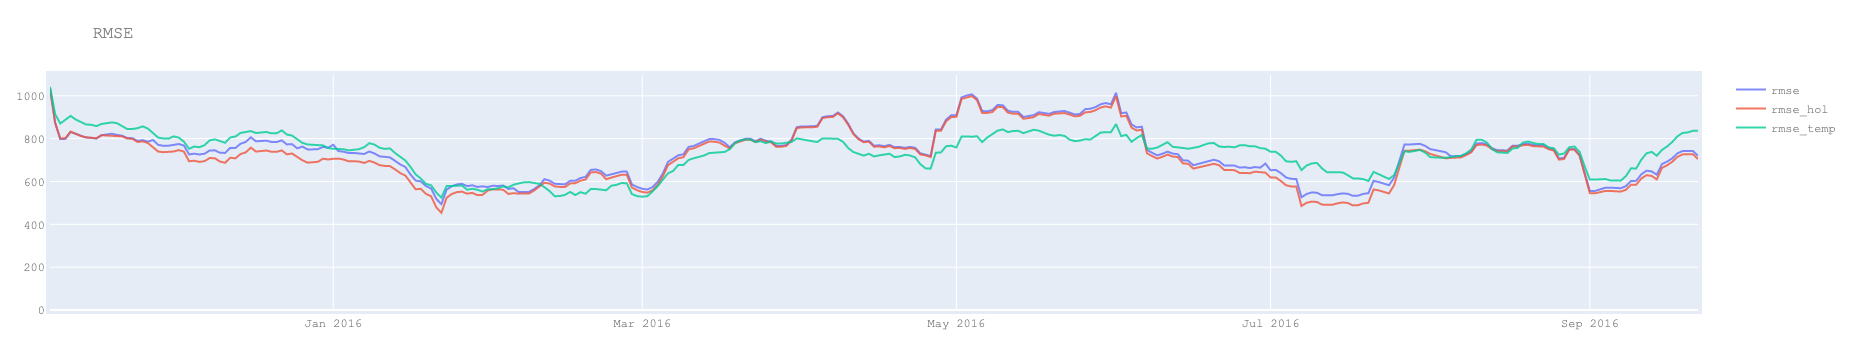

In [255]:
# adding temperature regressor
model = Prophet()
model.add_country_holidays(country_name = 'US')
model.add_regressor('temp', prior_scale = 0.5, mode = 'multiplicative')
model.fit(df_fb)

df_cv = cross_validation(model, initial = '720 days', period='180 days', horizon = '365 days')
df_p = performance_metrics(df_cv)
rmse['rmse_temp'] = df_p['rmse']

rmse_plot(df_cv, rmse)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 1 forecasts with cutoffs between 2015-10-01 00:00:00 and 2015-10-01 00:00:00


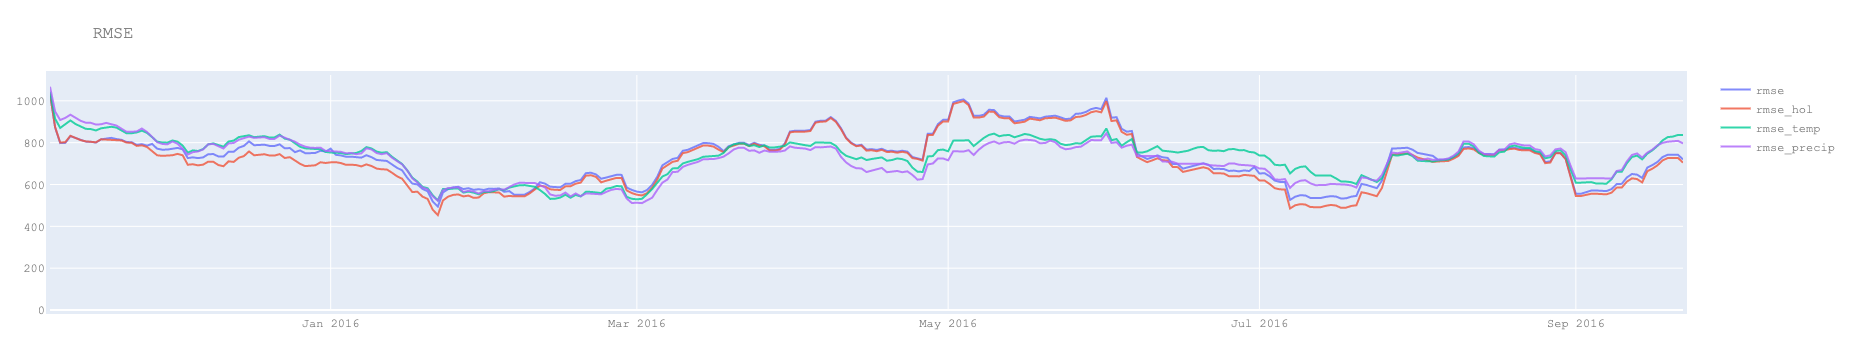

In [256]:
# adding precipitation regressor
model = Prophet()
model.add_country_holidays(country_name = 'US')
model.add_regressor('temp', prior_scale = 0.5, mode = 'multiplicative')
model.add_regressor('precip', prior_scale = 0.5, mode = 'multiplicative')
model.fit(df_fb)

df_cv = cross_validation(model, initial = '720 days', period='180 days', horizon = '365 days')
df_p = performance_metrics(df_cv)
rmse['rmse_precip'] = df_p['rmse']

rmse_plot(df_cv, rmse)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 1 forecasts with cutoffs between 2015-10-01 00:00:00 and 2015-10-01 00:00:00


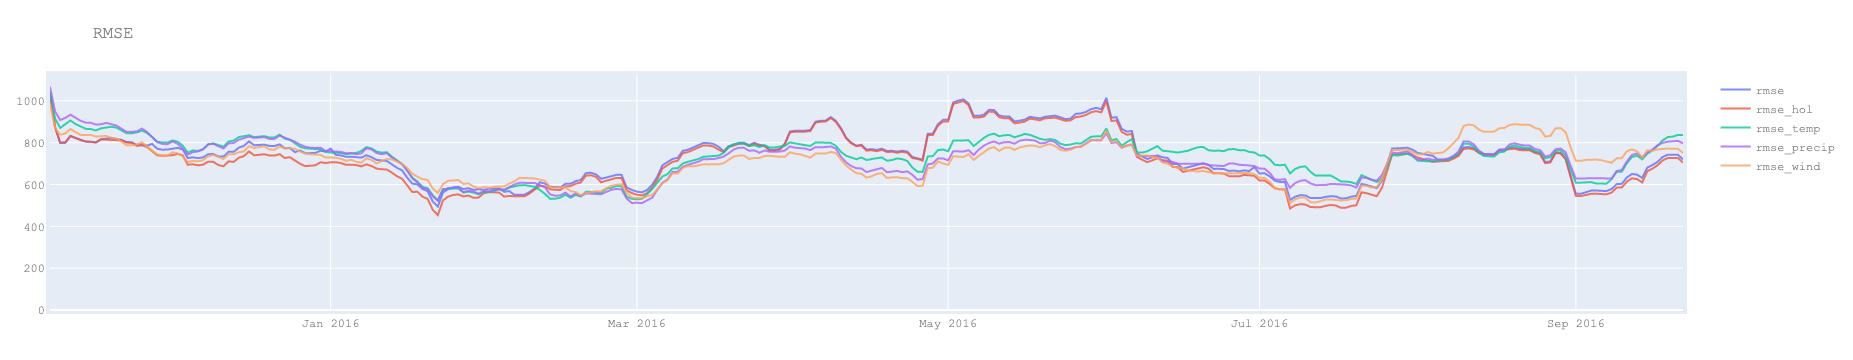

In [259]:
# adding wind regressor
model = Prophet()
model.add_country_holidays(country_name = 'US')
model.add_regressor('temp', prior_scale = 0.5, mode = 'multiplicative')
model.add_regressor('precip', prior_scale = 0.5, mode = 'multiplicative')
model.add_regressor('wind', prior_scale = 0.5, mode = 'multiplicative')

model.fit(df_fb)

df_cv = cross_validation(model, initial = '720 days', period='180 days', horizon = '365 days')
df_p = performance_metrics(df_cv)
rmse['rmse_wind'] = df_p['rmse']

rmse_plot(df_cv, rmse)

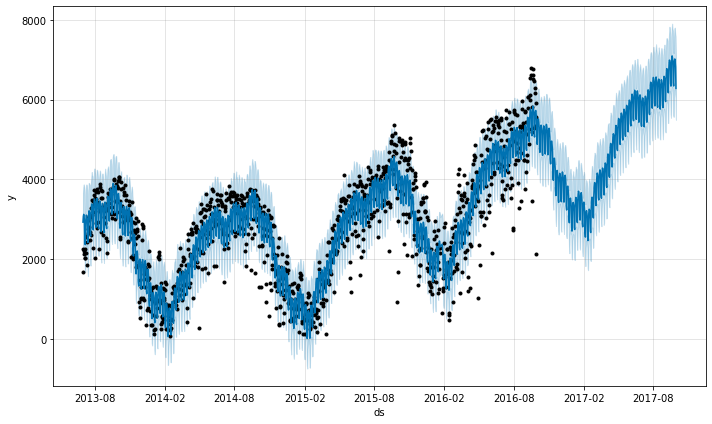

In [7]:
# making future dataframe
future = model.make_future_dataframe(periods = 365)

# generating forecast
forecast = model.predict(future)

# plotting forecast
fig1 = model.plot(forecast)

In [9]:
# from fbprophet.plot import plot_plotly
# import plotly.offline as py
# py.init_notebook_mode()

# fig = plot_plotly(model, forecast)  # This returns a plotly Figure
# py.iplot(fig)